Creates the database of the toolings by extracting the output file using RyR Generator target files and creates an Exploratory Data Analysis 

In [18]:
#% pip install openpyxl
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from _utilities import prepare_data, prepare_database, plot_scatter
import sys
sys.path.append("../tools/")
import _db_tools as db #Personal tool for managing sqlite databases in data science
####Global variables####
tooling = "PASSAT_B9"

In [20]:
#Database generation
confirmation = input("You are going to modify the database. Are you sure you wrote the correct tooling? (y/n): ").strip().lower()
if confirmation == 'y':
    MEAS = prepare_data("../a1_input/Target.xlsx", filter="MEAS") #Load the output from RyR_Generator into a df
    LIMITS = prepare_data("../a1_input/Target.xlsx", filter="limits") #Load the output from RyR_Generator into a df
    prepare_database(MEAS, tooling) #Store a df for the measures inside the database of the project
    prepare_database(LIMITS, tooling+"_limits") #Store a df for the limits inside the database of the project

In [21]:
#Data preparation
dbh = db.SQLite_Data_Extractor("database.db") #Connect to the database
df = dbh.retrieve(tooling) #Get the desired tooling data
dbh.close_conn() 
print("MEAS:")
df #Shows the df in html format

../database/database.db found.
Table PASSAT_B9 retrieved succesfully.
Closed connection to: ../database/database.db
MEAS:


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.3316,0.3316,0.3311,0.3314,0.3308,0.3298,0.3316,0.3316,0.3302,0.3298,...,0.3316,0.3316,0.3316,0.3316,0.3316,0.3315,0.3316,0.3316,0.3316,0.3316
1,0.3546,0.3546,0.3543,0.3544,0.3540,0.3534,0.3546,0.3546,0.3536,0.3534,...,0.3546,0.3546,0.3546,0.3546,0.3546,0.3545,0.3546,0.3546,0.3546,0.3546
2,0.3355,0.3355,0.3357,0.3356,0.3357,0.3350,0.3357,0.3356,0.3356,0.3352,...,0.3347,0.3355,0.3357,0.3353,0.3353,0.3356,0.3346,0.3349,0.3357,0.3351
3,0.3565,0.3565,0.3564,0.3565,0.3565,0.3562,0.3564,0.3565,0.3564,0.3563,...,0.3563,0.3565,0.3564,0.3563,0.3564,0.3565,0.3562,0.3562,0.3565,0.3565
4,0.3423,0.3424,0.3414,0.3414,0.3414,0.3416,0.3412,0.3421,0.3414,0.3412,...,0.3422,0.3410,0.3423,0.3420,0.3423,0.3422,0.3423,0.3423,0.3411,0.3411
5,0.3624,0.3625,0.3623,0.3623,0.3622,0.3623,0.3619,0.3623,0.3623,0.3619,...,0.3623,0.3618,0.3625,0.3622,0.3623,0.3623,0.3624,0.3624,0.3618,0.3618
6,0.3325,0.3325,0.3321,0.3325,0.3325,0.3322,0.3323,0.3325,0.3324,0.3318,...,0.3324,0.3320,0.3325,0.3325,0.3325,0.3325,0.3325,0.3325,0.3323,0.3320
7,0.3557,0.3557,0.3555,0.3557,0.3557,0.3556,0.3556,0.3557,0.3557,0.3554,...,0.3557,0.3555,0.3557,0.3557,0.3557,0.3557,0.3557,0.3557,0.3556,0.3554
8,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,...,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267,0.3267
9,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,...,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522,0.3522


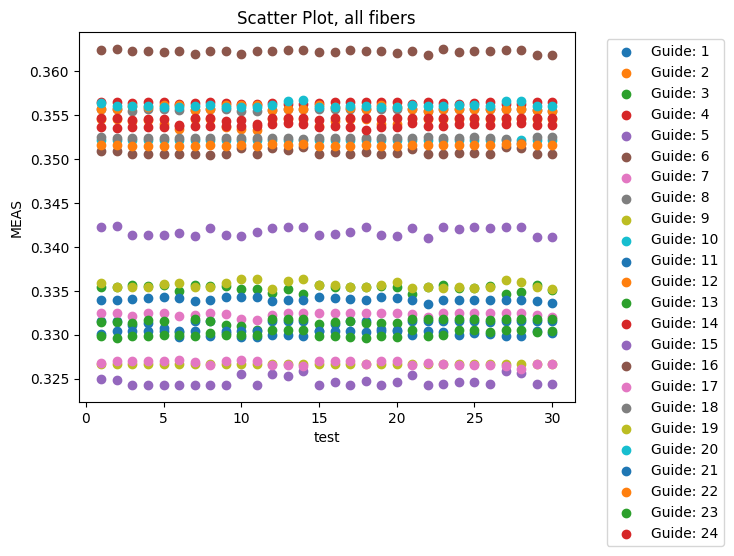

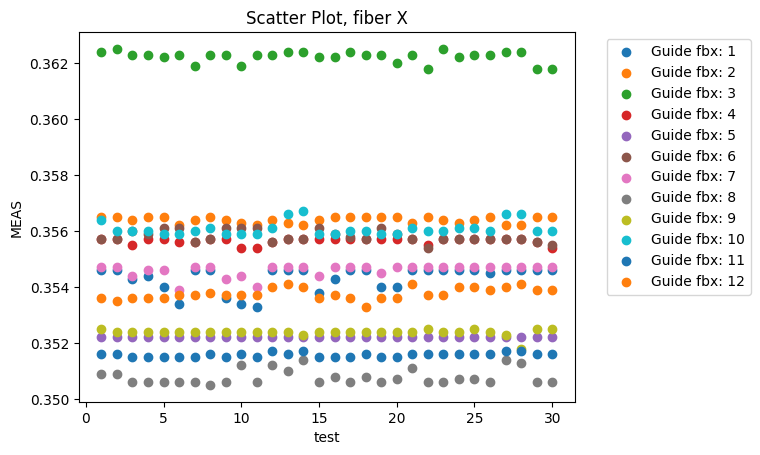

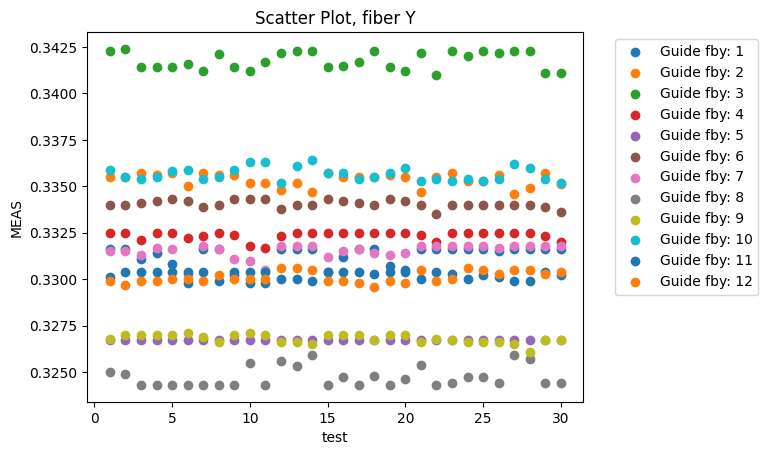

In [22]:
#Plots
plot_scatter(df, 'Scatter Plot, all fibers', 'test', 'MEAS', 'Guide: ') #Plot all guides
plot_scatter(df, 'Scatter Plot, fiber X', 'test', 'MEAS', 'Guide fbx: ', filter='x') #Plot x axis values
plot_scatter(df, 'Scatter Plot, fiber Y', 'test', 'MEAS', 'Guide fby: ', filter='y') #Plot y axis values

In [11]:
resume = df.transpose().describe() #Transpose the df first due to describe() working in columns.
df.transpose().describe() #This second call allows for a nicer output in jupiter.

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.318803,0.351857,0.336443,0.361273,0.347033,0.370767,0.324940,0.351857,0.334730,0.358860,...,0.331023,0.359110,0.346550,3.706000e-01,0.328820,0.356423,0.328883,0.357207,0.352143,0.374103
std,0.003852,0.001954,0.003784,0.001908,0.000698,0.000066,0.000512,0.000107,0.001856,0.001362,...,0.000128,0.000055,0.000274,1.129203e-16,0.000777,0.000599,0.002411,0.001217,0.000237,0.000018
min,0.318100,0.351500,0.328400,0.357200,0.346000,0.370700,0.324500,0.351700,0.333600,0.357700,...,0.331000,0.359100,0.345100,3.706000e-01,0.328600,0.356200,0.328300,0.356800,0.352100,0.374100
25%,0.318100,0.351500,0.334600,0.360300,0.346525,0.370700,0.324625,0.351800,0.333825,0.358025,...,0.331000,0.359100,0.346600,3.706000e-01,0.328600,0.356200,0.328300,0.356900,0.352100,0.374100
50%,0.318100,0.351500,0.337350,0.361700,0.346800,0.370800,0.324800,0.351900,0.334200,0.358500,...,0.331000,0.359100,0.346600,3.706000e-01,0.328700,0.356300,0.328400,0.356900,0.352100,0.374100
75%,0.318100,0.351500,0.338925,0.362650,0.347200,0.370800,0.325000,0.351900,0.334800,0.359100,...,0.331000,0.359100,0.346600,3.706000e-01,0.328700,0.356400,0.328600,0.357100,0.352100,0.374100
max,0.339200,0.362200,0.342200,0.364200,0.348800,0.370900,0.327200,0.352300,0.343800,0.364600,...,0.331700,0.359400,0.346600,3.706000e-01,0.332900,0.359500,0.341600,0.363600,0.353400,0.374200


Analysis of faulty fibers

In [12]:
largest = resume.loc['std'].sort_values(ascending=False)[:5]  #Filter the 5 largest values
index = largest.index.tolist()  #Get the index in a list format
for i in range(largest.shape[0]): #Differentiate between x-fibers (odds) and y-fibers
    if index[i] % 2 == 0:
        index[i] = f"fiber x {index[i]+1}:"
    else:
        index[i] = f"fiber y {index[i]+1}:"
largest.index = index
print("Fibers with largest deviation:")
print(largest)

Fibers with largest deviation:
fiber x 1:     0.003852
fiber x 3:     0.003784
fiber x 21:    0.002411
fiber y 2:     0.001954
fiber y 4:     0.001908
Name: std, dtype: float64


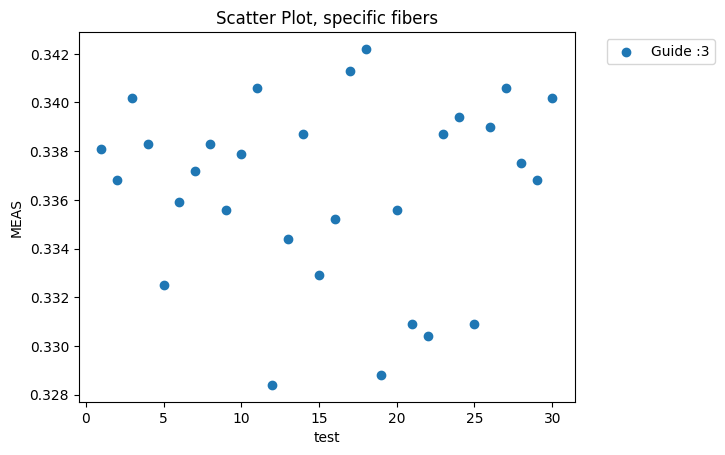

In [17]:
plot_scatter(df, 'Scatter Plot, specific fibers', 'test', 'MEAS', 'Guide :', filter=[3])

In [14]:
#Database management
""" dbh = db.SQLite_Data_Extractor("database.db") #Connect to the database
dbh.consult_tables()
dbh.clear_database() """

' dbh = db.SQLite_Data_Extractor("database.db") #Connect to the database\ndbh.consult_tables()\ndbh.clear_database() '